# Applied Data Science Capstone project

## Table of contents
* [Introduction / Business Understanding](#introduction)
* [Data](#data)
* [Exploratory Data Analysis](#exploratory)
* [Methodology](#methodology)
* [Results](#results)
* [Conclusion and Discussion](#conclusion)

### Introduction / Business Understanding <a name="introduction"></a>

The data I had is about accidents in Seattle city. With the data we have, we can predict the severity of the accident. So my attempt here or problem I choose here is to derive the severity of the accident. Generally in accidents, the primary things we would verify are road condition and visibility on the road and sometimes the weather plays a major role especially during rains and winter. Besides these speeding is the key indicator to judge the accident's cause. As all this information is there in that Seattle accidents data.

**Problem:**

The data we have is about accidents in Seattle city. With the data we have, we can predict the severity of the accident. So my attempt here or problem I choose here is to derive the severity of the accident. Generally in accidents, the primary things we would verify are road condition and visibility on the road and sometimes the weather plays a major role especially during rains and winter. Besides these speeding is the key indicator to judge the accident's cause. As all this information is there in that Seattle accident's data.

**Audience/Interests:**

As we are predicting the severity of the accident here, the primary audience will be the traffic police to do the primary analysis at offsite and take further steps based on the outcome. Besides them, insurance stakeholders can use this to predict the likely outcome if their policyholders had involved in this as an initial investigation report offsite. And a small set of the group would be the people who can use to know the likelihood of an unexpected journey based on factors like weather, road & lighting condition.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
!wget -O Datacollisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv('Datacollisions.csv')

--2020-09-05 20:54:35--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Datacollisions.csv’

100%[======================================>] 73,917,638  35.0MB/s   in 2.0s   

2020-09-05 20:54:38 (35.0 MB/s) - ‘Datacollisions.csv’ saved [73917638/73917638]



/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 ### DATA <a name="data"></a>
 
**Data sources:**

The data in this data source is provided by SPD and recorded by Traffic Records. This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df['SEVERITYCODE'].isnull().value_counts()

False    194673
Name: SEVERITYCODE, dtype: int64

In [5]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

**Data Cleaning:**

We had circa 193K+ records for accidents during the time span starting from 2004 to the recent past with 37 Independent variables and outcome or labelled data will severity of the accident. Severity has been categorized into 5 categories by SDOT.
A code that corresponds to the severity of the collision:
3—fatality
2b—serious injury
2—injury
1—prop damage
0—unknown

Out of all records, only circa 30% is having the predicted severity '1' records and the rest were severity 2. So have balanced the number of records for both the outcomes to prevent the bias towards one outcome as majority records can pull off many variations in prediction.
There is a lot of unusable data for our purpose like INCKEY, COLDETKEY, EXCEPTRSNCODE, EXCEPTRSNDESC etc..,. So have selected all the key factors present in the data for prediction which are
1. Weather condition.
2. Road condition.
3. Lighting condition.
4. Collision Address type
5. Speeding flag

After selecting the data, I have seen some missing values and have updated them as follows.
For weather, road condition, light condition & Address type data, have replaced the missing values with the unknown as already a certain number of records were having that values. A majority number of records are not having any data in the speeding flag, so assumed speeding was not there and replaced with no value as speeding not recorded.
After doing this sanitation, I have seen data in good form for normalizing and looked perfect as categorical values.


**We need to balance the dataset for both the classifiers to prevent the bias towards Severty code '1'**

In [6]:
df_sevcode1 = df[df['SEVERITYCODE'] == 1]
df_sevcode2 = df[df['SEVERITYCODE'] == 2]
pre_recsize = 0
if (df_sevcode1.shape[0]>df_sevcode2.shape[0]):
    pre_recsize=df_sevcode2.shape[0]
else:
    df_sevcode1.shape[0]
df=pd.concat([df_sevcode1.sample(pre_recsize), df_sevcode2])
df['SEVERITYCODE'].value_counts()
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
167925,1,-122.325944,47.618111,187416,245078,245678,3585732,Matched,Block,NaN,E OLIVE WAY BETWEEN E HOWELL ST AND E DENNY WAY,,NaN,1,Property Damage Only Collision,Other,2,0,0,2,2017/08/03 00:00:00+00,8/3/2017 9:35:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
77287,1,-122.361186,47.537267,84434,101587,101587,2609662,Matched,Block,NaN,DELRIDGE WAY SW BETWEEN SW ORCHARD ST AND SYLV...,NaN,NaN,1,Property Damage Only Collision,Rear Ended,4,0,0,2,2009/01/12 00:00:00+00,1/12/2009 5:41:00 PM,Mid-Block (but intersection related),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,9012022.0,NaN,14,From same direction - both going straight - on...,0,0,N
126239,1,-122.300986,47.709436,140496,159353,159373,3570871,Matched,Block,NaN,LAKE CITY WAY NE BETWEEN NE 110TH ST AND NE NO...,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2013/12/27 00:00:00+00,12/27/2013 3:45:00 PM,NaN,0,NOT ENOUGH INFORMATION / NOT APPLICABLE,Y,N,Overcast,Unknown,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
145557,1,-122.373776,47.543760,161729,202646,202786,3588282,Matched,Block,NaN,32ND AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,2,2015/09/21 00:00:00+00,9/21/2015 9:30:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,NaN,NaN,NaN,20,One car leaving parked position,0,0,N
52437,1,-122.356216,47.644118,58200,72032,72032,2807260,Matched,Block,NaN,NEWELL ST BETWEEN QUEEN ANNE AVE N AND 1ST S A...,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2007/02/16 00:00:00+00,2/16/2007 1:00:00 PM,Mid-Block (but intersection related),13,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Daylight,NaN,7047028.0,NaN,32,One parked--one moving,0,0,N


In [7]:
df['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

**Data Cleaning**

*Replacing the missing data with Unknown category values*

**Feature Selection**
After cleaning the data & balancing the variety in outcomes number, we have 116376 records. So now the feature selection for this data goes like this.

*Data Features selection:*

Weather condition.
Road condition.
Lighting condition.
Collision Address type
Speeding flag

All these fields will be outcomes from the onsite investigation so should not use as prediction.

So, we have selected these 5 Features to predict the label ‘SEVERITYCODE’ of the accident and to train the model using these 5 dependent variables.


In [8]:
df['WEATHER'] = df['WEATHER'].replace(np.nan,'WeatherUnknown')
df['WEATHER'] = df['WEATHER'].replace('Unknown','WeatherUnknown')
df['ROADCOND'] = df['ROADCOND'].replace(np.nan,'RoadUnknown')
df['ROADCOND'] = df['ROADCOND'].replace('Unknown','RoadUnknown')
df['LIGHTCOND'] = df['LIGHTCOND'].replace(np.nan,'LightUnknown')
df['LIGHTCOND'] = df['LIGHTCOND'].replace('Unknown','LightUnknown')
df['ADDRTYPE'] = df['ADDRTYPE'].replace(np.nan,'AddrUnknown')
df['ADDRTYPE'] = df['ADDRTYPE'].replace('Unknown','AddrUnknown')
df['SPEEDING'] = df['SPEEDING'].replace(np.nan,'N')
df['X'] = df['X'].replace(np.nan,df['X'].mean())
df['Y'] = df['Y'].replace(np.nan,df['Y'].mean())
df['Y'].isnull().value_counts()

False    116376
Name: Y, dtype: int64

### Exploratory Data Analysis <a name="exploratory"></a>

In [9]:
def dataforcharts(data, column):
    data = data[[column,'SEVERITYCODE','X']]
    bf = data.groupby([column,'SEVERITYCODE'], as_index = False).count().pivot('SEVERITYCODE', column)
    bf.fillna(0, inplace = True)
    return bf

**Relation between the Severity Code and the Road condition**
From the data, we can see that the most accidents happened when road is dry, 60% of the events occurred in dry road from all the readings we have in this data. And Severity 2 type accidents are more than severity 1 on dry roads.

X                                                      \
ROADCOND        Dry  Ice Oil Other RoadUnknown Sand/Mud/Dirt Snow/Slush   
SEVERITYCODE                                                              
1             36020  407  16    37        7834            18        337   
2             40064  273  24    43        1809            23        167   

                                    
ROADCOND     Standing Water    Wet  
SEVERITYCODE                        
1                        30  13489  
2                        30  15755

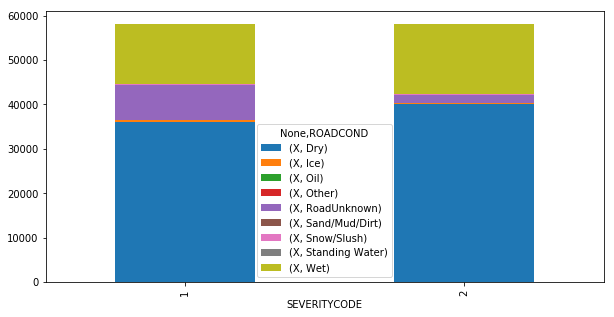

In [11]:
bf = dataforcharts(df,'ROADCOND')
bf.plot(kind="bar",  figsize=(10,5), stacked=True)
bf

**Relation between the Severity Code and the Weather condition:**

From the data, we can see that the most accidents happened when weather is very clear, approx... 60% of the events occurred when sky is clear from all the readings we have in this data. And Severity 2 type accidents are more than severity 1 on clear sky days.


X                                       \
WEATHER      Blowing Sand/Dirt  Clear Fog/Smog/Smoke Other Overcast   
SEVERITYCODE                                                          
1                           18  32129            168   283     8080   
2                           15  35840            187   116     8745   

                                                                              \
WEATHER      Partly Cloudy Raining Severe Crosswind Sleet/Hail/Freezing Rain   
SEVERITYCODE                                                                   
1                        2    9326                7                       29   
2                        3   11176                7                       28   

                                     
WEATHER      Snowing WeatherUnknown  
SEVERITYCODE                         
1                310           7836  
2                171           1900

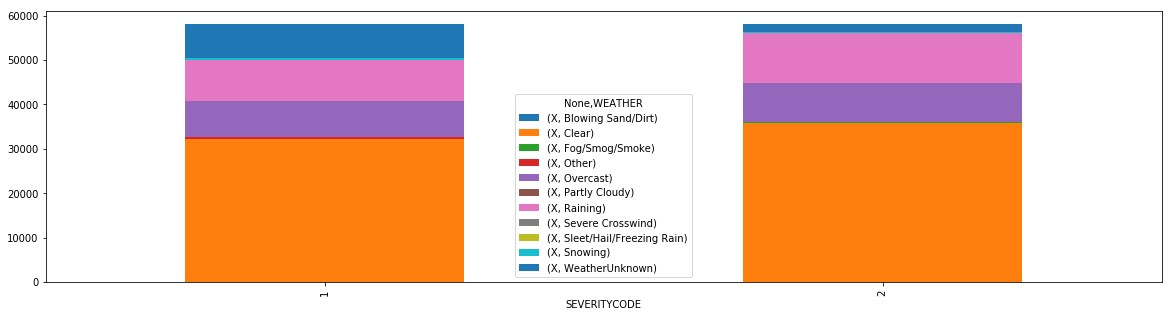

In [12]:
bf = dataforcharts(df,'WEATHER')
bf.plot(kind="bar",  figsize=(20,5), stacked=True)
bf

**Relation between the Severity Code and the Light condition:**

From the data, we can see that the most accidents happened during day time, approx... 50% of the events occurred when light is clear all the readings we have in this data. And Severity 2 type accidents are more than severity 1 during the day times.

X                           \
LIGHTCOND    Dark - No Street Lights Dark - Street Lights Off   
SEVERITYCODE                                                    
1                                488                      381   
2                                334                      316   

                                                                            \
LIGHTCOND    Dark - Street Lights On Dark - Unknown Lighting Dawn Daylight   
SEVERITYCODE                                                                 
1                              14529                       1  703    33100   
2                              14475                       4  824    38544   

                                       
LIGHTCOND     Dusk LightUnknown Other  
SEVERITYCODE                           
1             1644         7260    82  
2             1944         1695    52

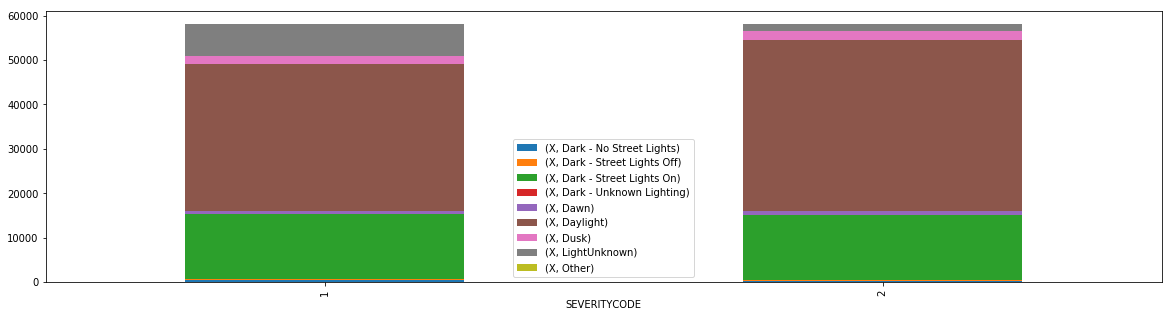

In [38]:
bf = dataforcharts(df,'LIGHTCOND')
bf.plot(kind="bar",  figsize=(20,5), stacked=True)
plt.legend(loc="best")
bf

**Relation between the Severity Code and the Collision address Type**

From the data, we can see that the most accidents happened across blocks & intersections, approx... 90% of the events occurred.  And Severity 1 type accidents are more than severity 2 across blocks.

X                          
ADDRTYPE     AddrUnknown Alley  Block Intersection
SEVERITYCODE                                      
1                    762   307  41161        15958
2                    191    82  30096        27819

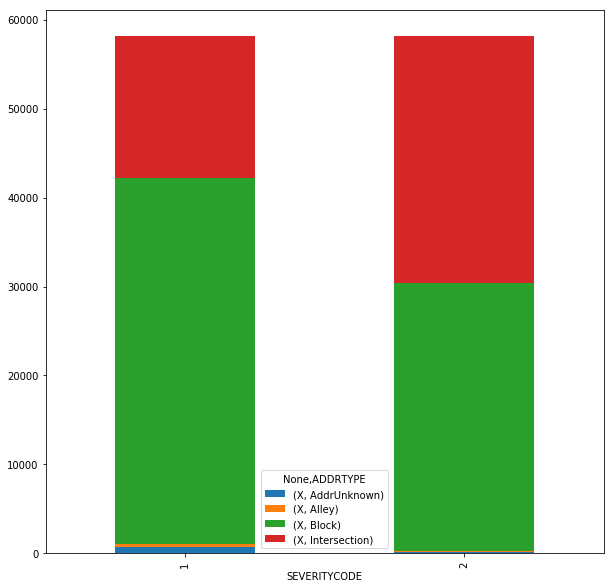

In [34]:
bf = dataforcharts(df,'ADDRTYPE')
bf.plot(kind="bar",  figsize=(10,10), stacked=True)
bf

**Relation between the Severity Code and the Speeding flag:**

From the data below you can see that only 10% speeding flags were recorded the feature set we have selected to train model. Besides that severity 2 type accidents are more than the severity 1 when unpermitted speeding causes the accident.


X      
SPEEDING          N     Y
SEVERITYCODE             
1             55752  2436
2             54657  3531

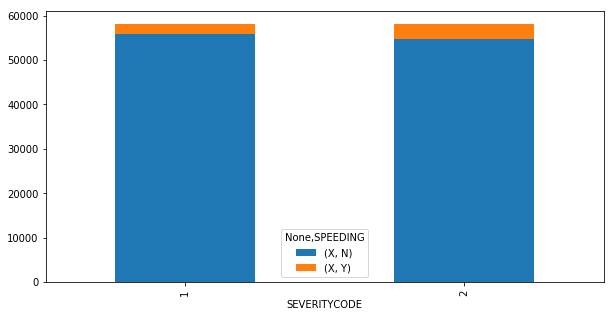

In [40]:
bf = dataforcharts(df,'SPEEDING')
bf.plot(kind="bar",  figsize=(10,5), stacked=True)
bf

*The one important finding I have noticed from the data which is not a feature variable to predict the severity, the field ‘ST_COLDESC’ which is post investigation outcome by SDOT to categorize the collision.
The following pie chart depicts the share of the most collision types in the data, and the shocking finding is that collisions happened mostly with parked vehicle, with vehicle going in same direction and vehicles entering in angels.*

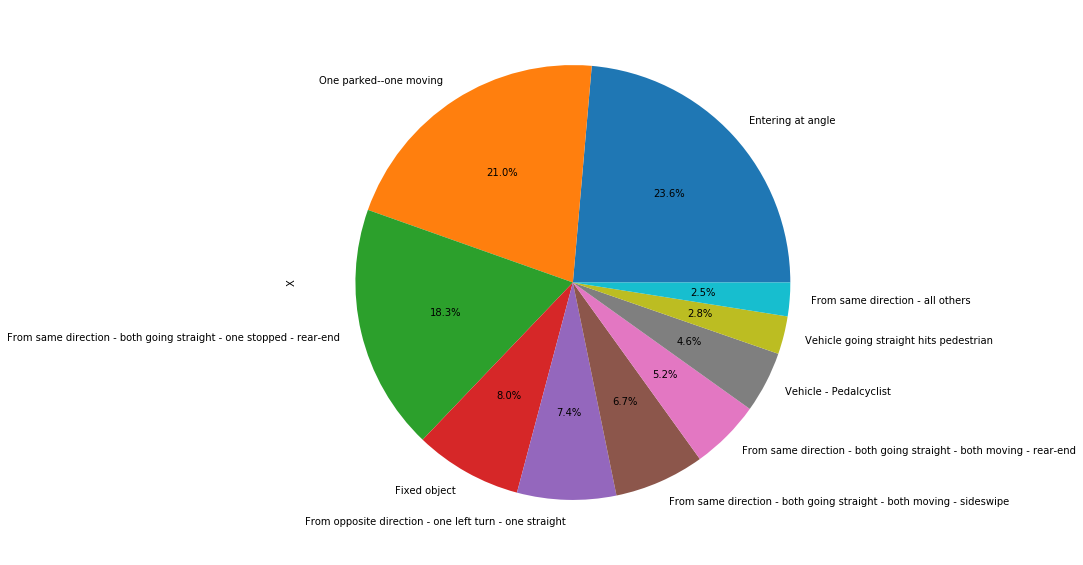

In [15]:
bf = df.groupby(['ST_COLDESC']).count()
bf.sort_values(by='X', ascending = False, inplace = True)
piedata = pd.DataFrame(bf['X'].head(10))
piedata.plot.pie(y='X', figsize=(10,10), autopct='%1.1f%%', legend = False)

Preparing the features data & label data for final pre processing of standarard scaling to train the models

In [16]:
label = df['SEVERITYCODE']
features = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'SPEEDING']]
features_weather = pd.get_dummies(df['WEATHER'])
features_road = pd.get_dummies(df['ROADCOND'])
features_light = pd.get_dummies(df['LIGHTCOND'])
features_addrtype = pd.get_dummies(df['ADDRTYPE'])
features_speeding = pd.get_dummies(df['SPEEDING'])
features = pd.concat([features, features_weather, features_road, features_light, features_addrtype, features_speeding], axis=1)
features.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'SPEEDING'], inplace = True,axis=1)
features.reset_index()
features.fillna(0)

In [17]:
features.head()

### Methodology <a name="methodology"></a>

As the outcome of the model will be a classified class, so we will use the classification models here for building the model. We can use any of these 3 models to build the data.

i.	K Nearest Neighbor(KNN)

ii.	Decision Tree 

iii.	Support Vector mission (SVM)


Selecting the important factors for model input, converting Categorical variables into numeric data for further processing and then applying the standard scaler for normalizing the data

In [ ]:
from sklearn import preprocessing
Features = features
features = preprocessing.StandardScaler().fit(features).transform(features)

In [19]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split( features, label, test_size=0.3)

**K Nearest Neighbor (KNN)**

We should find the best k to build the model with the best accuracy.

In classification using k-NN, we need to compute the distances between cases based upon their values in the feature (variable) set. The nearest neighbor to a given case has the smallest distances from that case. The distance between two cases can be the Euclidean distance or the city block distance.
The k-NN can be used for categorical or continuous outcome (dependent variable). For categorical dependent variable, k-nearest neighbors (k-NN) can be used to classify cases by classifying to the group which has the most neighbors. The algorithm can be summarized as follows:

1.	Specify a positive integer k. (k≥1).
2.	Calculate the distance between pairs of cases.
3.	If k=1 is chosen, classify the case into the group of its nearest neighbor.
4.	If (k≥1), classify the case into the group of the majority k-closest neighbors

In k-NN algorithm, continuous features are optionally coded using adjusted normalization.


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 30
mean = np.zeros((k-1))
std = np.zeros((k-1))
for i in range(1,k):
    n = KNeighborsClassifier(n_neighbors = i).fit(features_test,label_test)
    labelhat = n.predict(features_test)
    mean[i-1] = metrics.accuracy_score(label_test, labelhat)    
    std[i-1]=np.std(labelhat==label_test)/np.sqrt(labelhat.shape[0])

mean

array([0.55792971, 0.56589236, 0.57130582, 0.57820869, 0.5859422 ,
       0.58585627, 0.5876894 , 0.58700198, 0.59109787, 0.58880646,
       0.59943288, 0.60252628, 0.59679775, 0.60378656, 0.60312777,
       0.59210036, 0.60464583, 0.60948644, 0.60246899, 0.59814396,
       0.59453499, 0.59651133, 0.60421619, 0.60384384, 0.60347149,
       0.58940796, 0.59994844, 0.59986252, 0.60037808])

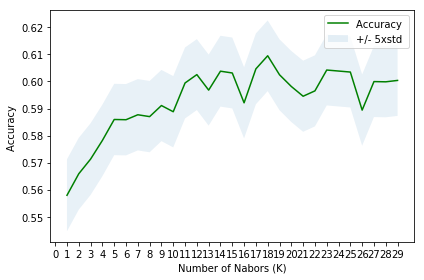

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(range(1,k),mean,'g')
plt.fill_between(range(1,k),mean - 5 * std,mean + 5 * std, alpha=0.10)
plt.legend(('Accuracy ', '+/- 5xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.xticks(np.arange(0, k, 1))
plt.tight_layout()
plt.show()

In [22]:
print( "The best accuracy was with", mean.max(), "with k=", mean.argmax()+1) 

The best accuracy was with 0.6094864377166098 with k= 18


In [23]:
knnModel = KNeighborsClassifier(n_neighbors = mean.argmax()+1).fit(features_train,label_train)
label_test_hat = knnModel.predict(features_test)

In [41]:
#KNN
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
jc_knn = jaccard_similarity_score(label_test, label_test_hat)
f1_knn = f1_score(label_test,label_test_hat, average='weighted') 
recall_knn = metrics.recall_score(label_test, label_test_hat, average='weighted')
precision_knn = metrics.precision_score(label_test, label_test_hat, average='weighted')
print('jaccard_similarity_score for KNN ' + str(jc_knn))
print('f1_score for KNN ' + str(f1_knn))
print('Recall score for KNN ' + str(recall_knn))
print('Precision score for KNN ' + str(precision_knn))
metrics.accuracy_score(label_test, label_test_hat)

jaccard_similarity_score for KNN 0.5309197147194454
f1_score for KNN 0.5297590757545433
Recall score for KNN 0.5309197147194454
Precision score for KNN 0.5312112820034307


0.5309197147194454

**Decision trees:**

Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, and then moving down the tree branch corresponding to the value of the attribute as shown in the above figure. This process is then repeated for the subtree rooted at the new node.


In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy")
dTree.fit(features_train,label_train)
label_test_hat = dTree.predict(features_test)
jc_dtree = jaccard_similarity_score(label_test, label_test_hat)
f1_dtree = f1_score(label_test,label_test_hat, average='weighted') 
print('jaccard_similarity_score for Decision Tree ' + str(jc_dtree))
print('f1_score for decision Tree ' + str(f1_dtree))
recall_dtree = metrics.recall_score(label_test, label_test_hat, average='weighted')
precision_dtree = metrics.precision_score(label_test, label_test_hat, average='weighted')
print('Recall score for decision tree ' + str(recall_dtree))
print('Precision score for decision tree ' + str(precision_dtree))
metrics.accuracy_score(label_test, label_test_hat)

jaccard_similarity_score for Decision Tree 0.608913585197491
f1_score for decision Tree 0.6053587959973631
Recall score for decision tree 0.608913585197491
Precision score for decision tree 0.6129466428339209


0.608913585197491

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.949851 to fit



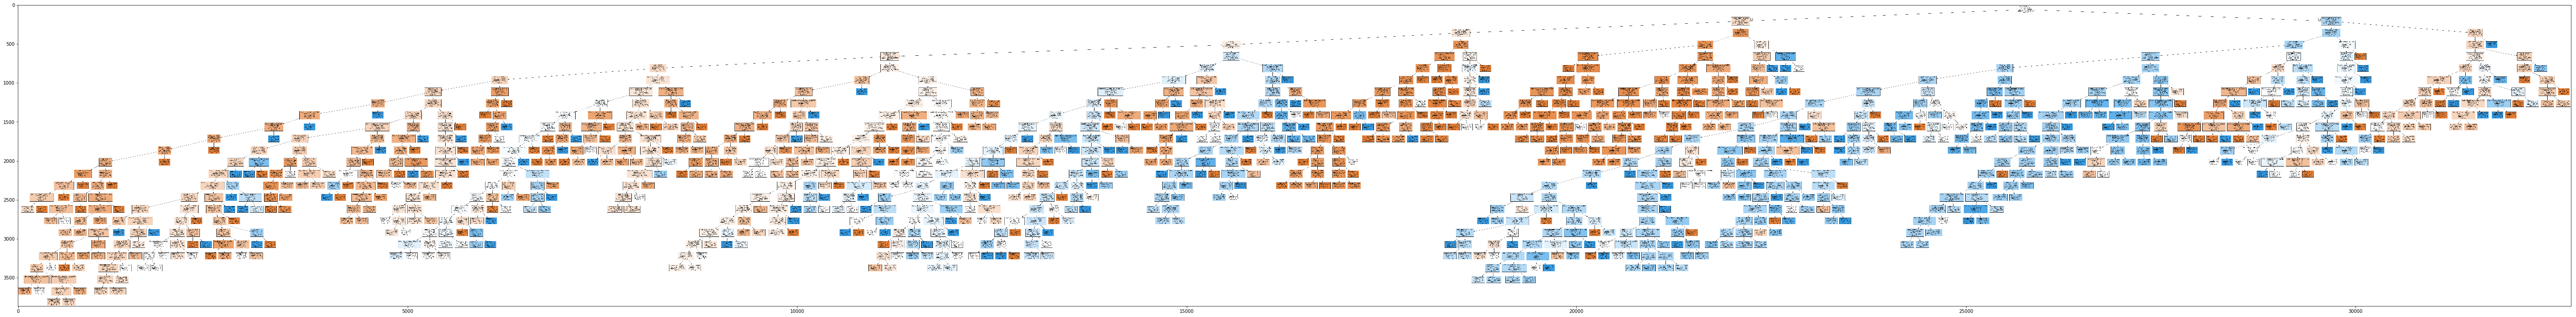

In [26]:
!pip install pydotplus
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "decisionTree.png"
featureNames = Features.columns.tolist()
targetNames = ['1', '2']
output=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= targetNames, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

**Support Vector Machine:**

Support Vector Machine (SVM) has been reported to be a flexible classifier by data mining community and delivers quite promising results in handling imbalanced dataset. 

SVMs belong to the general category of kernel methods which are algorithms that depends on the data only through the dot-products. These dot-products can be transformed by a kernel function which computes a dot-product in high dimensional feature space.


As a classifier, the SVM has the ability to generate nonlinear decision boundaries using methods designed for linear classifiers. In addition, the use of kernel functions allows the data scientist, and SVM users to apply a classifier to any datasets which have no obvious representation in terms of patterns. The strengths of SVM have made this classifier popular in scientific and medical studies. SVM has been used in recognition of human movement patterns and experiments on different kernels on SVM have shown that it was successful when applied to imbalanced data. Classification of SVM is achieved by realizing a linear or non-linear separation surface in the input space.


In [43]:
#Support Vector Machine
from sklearn import svm
svm_model = svm.SVC(kernel='sigmoid')
svm_model.fit(features_train,label_train) 
label_test_hat = svm_model.predict(features_test)
jc_svm = jaccard_similarity_score(label_test, label_test_hat)
f1_svm = f1_score(label_test, label_test_hat, average='weighted') 
print('jaccard_similarity_score for SVM ' + str(jc_svm))
print('f1_score for SVM ' + str(f1_svm))
recall_svm = metrics.recall_score(label_test, label_test_hat, average='weighted')
precision_svm = metrics.precision_score(label_test, label_test_hat, average='weighted')
print('Recall score for SVM ' + str(recall_svm))
print('Precision score for SVM ' + str(precision_svm))
metrics.accuracy_score(label_test, label_test_hat)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


jaccard_similarity_score for SVM 0.5309197147194454
f1_score for SVM 0.5297590757545433
Recall score for SVM 0.5309197147194454
Precision score for SVM 0.5312112820034307


0.5309197147194454

### Results<a name="results"></a>

Model evaluation will be carried out by scoring the model using following indexes/scores.

The two scores we will be looking at are the Jaccard Score and the F1 Score, which is based on recall and precision scores: 
1. Jaccard Score: Also called Jaccard index, Intersection over Union and the Jaccard similarity coefficient (originally given the French name coefficient de community by Paul Jaccard), is a statistic used for gauging the similarity and diversity of sample sets. The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets5 

2. F1 Score: measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive. 

3. Recall Score: Recall is the ratio of correctly predicted positive observations to all observations in a class. The question recall answers for instance is: Of all the accidents labeled as Injury that truly involved an Injury, how many did we label correctly 

4. Precision Score: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer for instance is of all accidents labeled as Injury, how many involved Injury? High precision relates to the low false positive rate. 

| Metrics	    | KNN	 | Decision Tree  | SVM     |
| ------------- | ------ | -------------- | ------- |
| Jaccard Index	| 0.530	 | 0.608	      | 0.530   |
| F1 Score	    | 0.529	 | 0.605	      | 0.529   |
| Precision	    | 0.531  | 0.608	      | 0.530   |
| Recall	    | 0.530  | 0.612          | 0.531   |

After evaluating the scores for all the models we trained, Decision tree looks better than remaining with accuracy rate around 60%, model accuracy can be increased with help of more data as this data is not having all the possible outcomes.


### Conclusions and Discussions<a name="conclusion"></a>

In this case study, I have analyzed the Seattle accidents data to predict the severity of the accident using the 5 features weather condition, road condition, lighting condition, collision address type & speeding index.

The results highlighted the unexpected insight as most accidents were happening when all the things were perfect like most accidents occurred during day times if we thought 
that lighting may be reason.

Most accidents occurred during the clear sky if we think rains, fog or snow might cause the accident.

Likewise most accidents happened on the dry roads if we think road’s behavior may be the reason.

And in context of speeding, only 10% of the selected data are having speeding Index is Y, so speeding is not the complete reason. Many accidents happened across the intersections & blocks.

But the one important finding I have noticed from the data which is not a feature variable to predict the severity, the field ‘ST_COLDESC’ which is post investigation outcome by SDOT to categorize the collision.

The conclusion from this finding is to manage the vehicles going in same direction to follow proper distancing between the vehicles going in the same direction and following the proper lines to avoid slipping into parking lanes.

Riders should make use of side signals mostly to avoid the accidents between the vehicles going in same direction or with parked cars.

